Data : https://data.edd.ca.gov/Labor-Force-and-Unemployment-Rates/Local-Area-Unemployment-Statistics-LAUS-/e6gw-gvii

In [1]:
from utils import eda
import ipywidgets as widgets
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
eda_iv = eda.Eda()

In [3]:
#https://ipython.org/ipython-doc/3/interactive/reference.html
!head -n3 './Local_Area_Unemployment_Statistics__LAUS_.csv'

Area Type ,Area Name ,Date,Year ,Month,Seasonally Adjusted (Y/N) ,Status (Preliminary / Final) ,Labor Force,Employment ,Unemployment ,Unemployment Rate 
County,Alameda County,06/01/2019,2019,June,N,Preliminary,844400,818500,25800,0.0
County,Alpine County,06/01/2019,2019,June,N,Preliminary,480,450,40,0.1


In [4]:
eda_iv.load_data('./Local_Area_Unemployment_Statistics__LAUS_.csv')

In [5]:
df_us = eda_iv.df

In [6]:
eda_iv.view_data_details()

********** info **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148963 entries, 0 to 148962
Data columns (total 11 columns):
area type                       148963 non-null object
area name                       148963 non-null object
date                            148963 non-null object
year                            148963 non-null int64
month                           148963 non-null object
seasonally adjusted (y/n)       148963 non-null object
status (preliminary / final)    148963 non-null object
labor force                     148963 non-null int64
employment                      148963 non-null int64
unemployment                    148963 non-null int64
unemployment rate               148963 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB
None
********** columns **********
Index(['area type', 'area name', 'date', 'year', 'month',
       'seasonally adjusted (y/n)', 'status (preliminary / final)',
       'labor force', 'employment', 

In [7]:
df_us['date'] = pd.to_datetime(df_us['date'])

In [8]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148963 entries, 0 to 148962
Data columns (total 11 columns):
area type                       148963 non-null object
area name                       148963 non-null object
date                            148963 non-null datetime64[ns]
year                            148963 non-null int64
month                           148963 non-null object
seasonally adjusted (y/n)       148963 non-null object
status (preliminary / final)    148963 non-null object
labor force                     148963 non-null int64
employment                      148963 non-null int64
unemployment                    148963 non-null int64
unemployment rate               148963 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [9]:
eda_iv.check_for_constant_columns()

[]

In [10]:
eda_iv.view_column_value_counts()

Dropdown(description='Columns', options=('area type', 'area name', 'date', 'year', 'month', 'seasonally adjust…

Sub-County Place     106134
Metropolitan Area     21154
County                20799
State                   876
Name: area type, dtype: int64


In [11]:
eda_iv.view_cardinality_of_data()

Cardinality of data
area type : 4
area name : 1049
date : 522
year : 44
month : 12
seasonally adjusted (y/n) : 2
status (preliminary / final) : 2
labor force : 21803
employment : 21677
unemployment : 12734
unemployment rate : 10


In [12]:
df_us.groupby('area type')['area name'].nunique()

area type
County                58
Metropolitan Area     59
State                  1
Sub-County Place     931
Name: area name, dtype: int64

In [13]:
df_us.loc[df_us['area type']=='County','area name'].value_counts()

Los Angeles County        708
Monterey County           354
Yolo County               354
Santa Clara County        354
Amador County             354
Placer County             354
Contra Costa County       354
Mariposa County           354
Modoc County              354
Sutter County             354
San Benito County         354
San Bernardino County     354
Stanislaus County         354
Ventura County            354
Del Norte County          354
Tuolumne County           354
Trinity County            354
Alpine County             354
Kern County               354
Napa County               354
Alameda County            354
Plumas County             354
Mono County               354
Sacramento County         354
San Francisco County      354
Mendocino County          354
Colusa County             354
San Diego County          354
Kings County              354
Glenn County              354
Santa Cruz County         354
Fresno County             354
San Mateo County          354
Madera Cou

In [14]:
df_us.loc[df_us['area type']=='Metropolitan Area','area name'].value_counts()

Los Angeles-Long Beach-Glendale MD                            708
Fresno MSA                                                    354
Fresno, CA MSA                                                354
Redding MSA                                                   354
Chico, CA MSA                                                 354
Hanford-Corcoran, CA MSA                                      354
Visalia-Porterville, CA MSA                                   354
Madera MSA                                                    354
Sacramento--Roseville--Arden-Arcade, CA MSA                   354
Yuba City MSA                                                 354
San Francisco-Oakland-Hayward, CA MSA                         354
Riverside-San Bernardino-Ontario MSA                          354
San Luis Obispo-Paso Robles-Arroyo Grande MSA                 354
San Rafael, CA Met Div                                        354
Stockton-Lodi MSA                                             354
Oxnard-Tho

In [15]:
df_us.loc[df_us['area type']=='State', ['date','labor force', 'employment', 'unemployment', 'unemployment rate']].head()

,date,labor force,employment,unemployment,unemployment rate
119,2019-06-01,19421500,18607800,813700,0.0
120,2019-06-01,19293700,18493300,800500,0.0
1171,2019-05-01,19479200,18653100,826100,0.0
1172,2019-05-01,19290200,18609200,680900,0.0
2223,2019-04-01,19528400,18692500,835900,0.0


In [16]:
df_us.loc[df_us['area type']=='State','seasonally adjusted (y/n)'].value_counts()

Y    522
N    354
Name: seasonally adjusted (y/n), dtype: int64

In [17]:
df_us.loc[(df_us['area type']=='State') & (df_us['seasonally adjusted (y/n)']=='Y')].head()

,area type,area name,date,year,month,seasonally adjusted (y/n),status (preliminary / final),labor force,employment,unemployment,unemployment rate
119,State,California,2019-06-01,2019,June,Y,Preliminary,19421500,18607800,813700,0.0
1171,State,California,2019-05-01,2019,May,Y,Final,19479200,18653100,826100,0.0
2223,State,California,2019-04-01,2019,April,Y,Final,19528400,18692500,835900,0.0
3276,State,California,2019-03-01,2019,March,Y,Final,19580200,18741900,838300,0.0
4328,State,California,2019-02-01,2019,February,Y,Final,19582200,18758000,824200,0.0


In [18]:
df_state_seas_adjusted = df_us.loc[(df_us['area type']=='State') & (df_us['seasonally adjusted (y/n)']=='Y'), ['date','labor force', 'employment', 'unemployment']]

In [19]:
#df_state_seas_adjusted['diff'] = df_state_seas_adjusted['labor force'] - df_state_seas_adjusted['employment']

In [27]:
df_state_seas_adjusted.head()

,date,labor force,employment,unemployment
119,2019-06-01,19421500,18607800,813700
1171,2019-05-01,19479200,18653100,826100
2223,2019-04-01,19528400,18692500,835900
3276,2019-03-01,19580200,18741900,838300
4328,2019-02-01,19582200,18758000,824200


In [21]:
df_state_seas_adjusted.duplicated().sum()

0

In [22]:
df_state_seas_adjusted.set_index('date').sort_index().index

DatetimeIndex(['1976-01-01', '1976-02-01', '1976-03-01', '1976-04-01',
               '1976-05-01', '1976-06-01', '1976-07-01', '1976-08-01',
               '1976-09-01', '1976-10-01',
               ...
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='date', length=522, freq=None)

In [23]:
#_=df_state_seas_adjusted.set_index('date').sort_index().rolling(window='365D').mean().plot()

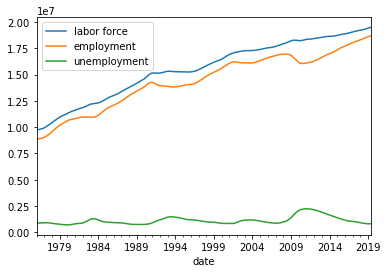

In [24]:
df_state_seas_adjusted_365_mean = df_state_seas_adjusted.set_index('date').sort_index().rolling(window='365D').mean()
_=df_state_seas_adjusted_365_mean.plot()

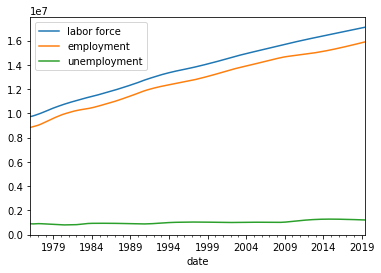

In [26]:
df_state_seas_adjusted_365_mean = df_state_seas_adjusted.set_index('date').sort_index().ewm(span=500).mean()
_=df_state_seas_adjusted_365_mean.plot()

In [ ]:
#df_state_seas_adjusted.set_index('date').plot()

In [ ]:
df_us.loc[(df_us['area type']=='State') & (df_us['seasonally adjusted (y/n)']=='N')].head()

In [28]:
df_state_seas_not_adjusted = df_us.loc[(df_us['area type']=='State') & (df_us['seasonally adjusted (y/n)']=='N'), ['date','labor force', 'employment', 'unemployment']]

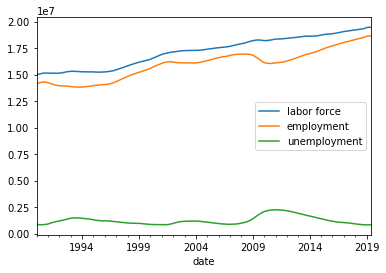

In [29]:
df_state_seas_not_adjusted_365_mean = df_state_seas_not_adjusted.set_index('date').sort_index().rolling(window='365D').mean()
_=df_state_seas_not_adjusted_365_mean.plot()

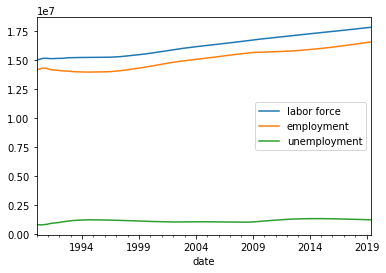

In [30]:
df_state_seas_not_adjusted_365_mean = df_state_seas_not_adjusted.set_index('date').sort_index().ewm(span=500).mean()
_=df_state_seas_not_adjusted_365_mean.plot()